In [ ]:
# Modulos y datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Dataset
data = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/breast-cancer-wisconsin.csv")

In [ ]:
# Nombres de las columnas
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# Eliminamos  Columna : "id"
data = data.drop(["id", "Unnamed: 32"], axis = 1)

In [ ]:
# Tipos de dato para cada columna
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
# Valores faltantes
data.isnull().sum().sum()

0

In [ ]:
# Niveles de la variable dependiente (cualitativa) : Modelo de Clasificacion
data.diagnosis.unique()

# M : Maligno
# B : Benigno

array(['M', 'B'], dtype=object)

<Axes: xlabel='diagnosis', ylabel='count'>

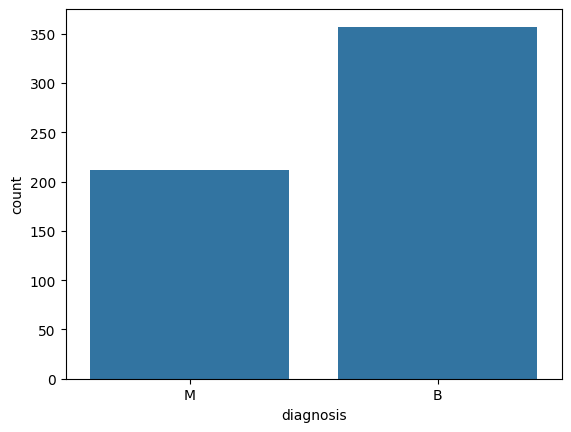

In [ ]:
# Distribucion de los niveles de la variables dependiente
sns.countplot(x = "diagnosis", data = data)

# En funcion a este grafico :
  # Consideramos que la variable dependiente esta balanceada

In [ ]:
# Construccion de nuestro primer modelo de clasificacion : Modelo Lineal Generalizado : Regresion Logistica

# Definir las variables independientes  y la variable dependiente
y = data.diagnosis
X = data.drop(["diagnosis"], axis = 1)

# Particionado de los datos
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size = 0.15,
                                                stratify= y)

# Instanciamos el modelo de regresion logistica  : Modelo Base
ModClfBase = LogisticRegression(max_iter = 10000)
#  En funcion de un warning obtenido :
  # /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
  # STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
# Leimos la documentacion de la clase LogisticRegression y decidimos modificar el varlo por
# defecto del argumento max_iter. Buscando con ello que el algoritmo termine y logre la convergencia.

# Ajustamos el modelo
ModClfBase.fit(Xtrain, ytrain)

# Calculemos el R2
ModClfBase_R2 = ModClfBase.score(Xtrain, ytrain)
print("R2 : %.3f" %(ModClfBase_R2))


# COnstruyamos pronosticos de la variable dependiente : usando el modelo ajustado y los datos de test
y_model = ModClfBase.predict(Xtest)

# Calculemos un indicador de calidad
MatrizConfusionBase = metrics.confusion_matrix(ytest,y_model)
print("Matriz de Confusion \n" , MatrizConfusionBase)

# Construyamos nuestro propio indicador de calidad
KPI_Clf = ((MatrizConfusionBase[0,1] + MatrizConfusionBase[1,0])/np.sum(MatrizConfusionBase))*100
print("Porcentajes de errores : %.2f" %(KPI_Clf))

R2 : 0.963
Matriz de Confusion 
 [[51  3]
 [ 2 30]]
Porcentajes de errores : 5.81


In [ ]:
# Documentacion de la clase LogisticRegression
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [ ]:
# Barrido de Hiperparametros
from sklearn.model_selection import GridSearchCV

# Diccionario con los posibles valores para los argumentos a considerar
DictHP_RegLog_1 = {"penalty":["l1", "l2", "elasticnet", "None"],
                   "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                   "C":np.hstack((np.linspace(0,0.5, num = 10), np.exp(np.linspace(0,0.5, num = 10)*10) ))
                   }

# Crear un modelo (Instancia de LogisticRegression) para realizar el barrido de Hiperparametros
ModClf_Barrido = LogisticRegression(max_iter= 15000)

# Configuracion del GridSearch
ModClf_Barrido_GS1 = GridSearchCV(estimator = ModClf_Barrido,
                                  param_grid = DictHP_RegLog_1 ,
                                  cv = 3)

# Ajustamos cada uno de los posibles modelos
import time
i1 = time.time()
Historia_GridSearch = ModClf_Barrido_GS1.fit(Xtrain, ytrain)
i2 = time.time()

print("Tiempo de procesamiento " , i2-i1)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
984 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/l

Tiempo de procesamiento  368.70216131210327


In [ ]:
# Tipo de dato
type(Historia_GridSearch)

sklearn.model_selection._search.GridSearchCV

In [ ]:
# Lista de metodos que podemos aplicar
dir(Historia_GridSearch)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'i

In [ ]:
# Documentacion del metodo best_params_
help(Historia_GridSearch.best_params_)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>va

In [ ]:
#
Historia_GridSearch.best_params_

{'C': 85.1525577175522, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
# Documentacion del metodo best_estimator_
help(Historia_GridSearch.best_estimator_)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [ ]:
Historia_GridSearch.best_estimator_

LogisticRegression(C=85.1525577175522, max_iter=15000, penalty='l1',
                   solver='liblinear')

In [ ]:
Historia_GridSearch.cv_results_

{'mean_fit_time': array([1.27482414e-03, 9.74098841e-04, 1.03982290e-03, 1.04967753e-03,
        1.06581052e-03, 1.01041794e-03, 1.04125341e-03, 8.95738602e-04,
        1.03020668e-03, 9.32772954e-04, 9.15527344e-04, 2.37186750e-03,
        9.55104828e-04, 9.29911931e-04, 9.76880391e-04, 1.08957291e-03,
        1.13654137e-03, 1.11190478e-03, 9.94205475e-04, 9.16719437e-04,
        1.07924143e-03, 1.15982691e-03, 9.46601232e-04, 1.11603737e-03,
        1.17659569e-03, 5.73272705e-02, 1.35715803e-03, 1.18581454e-03,
        1.17023786e-03, 7.66278426e-01, 1.66815758e-01, 9.59118207e-03,
        1.24846617e-01, 1.68817043e-02, 5.62671820e-01, 5.32583157e-01,
        1.46865845e-03, 1.16602580e-03, 1.12152100e-03, 1.31201744e-03,
        1.22141838e-03, 5.47949473e-03, 1.56116486e-03, 1.63372358e-03,
        1.18176142e-03, 1.12779935e-03, 1.01065636e-03, 1.26862526e-03,
        1.57872836e-03, 1.45833492e-01, 1.24700864e-03, 1.19328499e-03,
        1.23230616e-03, 1.56820432e+00, 1.96950

In [ ]:
Historia_GridSearch.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [ ]:
# Usemos ese mejor modelo
MejorModeloClf = LogisticRegression(C = 85.1525577175522,
                                    max_iter = 15000,
                                    penalty = "l1",
                                    solver = "liblinear")

MejorModeloClf.fit(Xtrain, ytrain)

R2_MejorModeloClf = MejorModeloClf.score(Xtrain,ytrain)
y_mejorModelo = MejorModeloClf.predict(Xtest)
MatrizConf_MejorModelo = metrics.confusion_matrix(ytest, y_mejorModelo)
MatrizConf_MejorModelo



array([[52,  2],
       [ 0, 32]])

In [ ]:
# Serializacion del Mejor Modelo obtenido
import pickle

# Definamos un nombre de archivo para "volcar" mi modelo a disco duro
MejorModeloDD = "ModeloClf_AbrahamZamudio_4Julio.pkl"

# "Volcamos" MejorModeloClf a disco duro
with open(MejorModeloDD, "wb") as file:
  pickle.dump(MejorModeloClf, file)